# Implement Discrete Cosine Transform (DCT)

# DCT D matrix

Is a matrix that transforms the input image/signal into vector $x$. Matrix D is orthogonal.

In [17]:
import numpy as np
import pandas as pd

# Define the block size (JPEG uses 8x8)
N = 8

# Initialize the DCT matrix
D = np.zeros((N, N))

# Compute the DCT matrix using the formula
for k in range(N):
    for n in range(N):
        alpha_k = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)
        D[k, n] = alpha_k * np.cos((np.pi * (2*n + 1) * k) / (2 * N))

# Display the computed DCT matrix

pd.DataFrame(D)

,0,1,2,3,4,5,6,7
0,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553
1,0.490393,0.415735,0.277785,0.097545,-0.097545,-0.277785,-0.415735,-0.490393
2,0.461940,0.191342,-0.191342,-0.461940,-0.461940,-0.191342,0.191342,0.461940
3,0.415735,-0.097545,-0.490393,-0.277785,0.277785,0.490393,0.097545,-0.415735
4,0.353553,-0.353553,-0.353553,0.353553,0.353553,-0.353553,-0.353553,0.353553
5,0.277785,-0.490393,0.097545,0.415735,-0.415735,-0.097545,0.490393,-0.277785
6,0.191342,-0.461940,0.461940,-0.191342,-0.191342,0.461940,-0.461940,0.191342
7,0.097545,-0.277785,0.415735,-0.490393,0.490393,-0.415735,0.277785,-0.097545


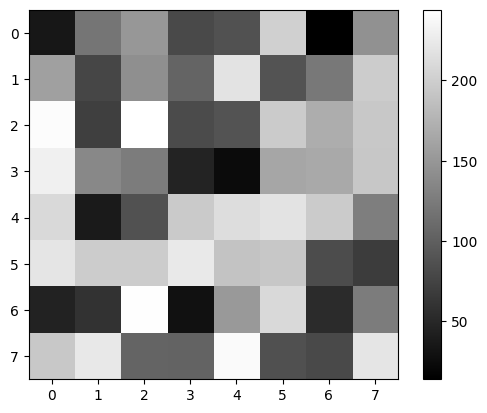

In [18]:
import matplotlib.pyplot as plt

signal = np.array(np.random.rand(N, N) * 255, dtype=int)
plt.imshow(signal, cmap='gray')

# Add legend
plt.colorbar()
plt.show()

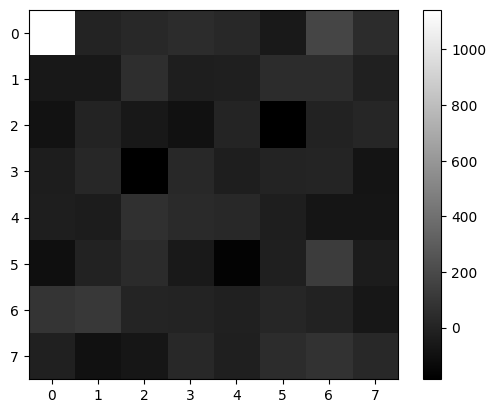

In [19]:
# Compute the DCT of the signal
dct = D @ signal @ D.T

# Display the DCT of the signal
plt.figure()
plt.imshow(dct, cmap='gray')
plt.colorbar()
plt.show()

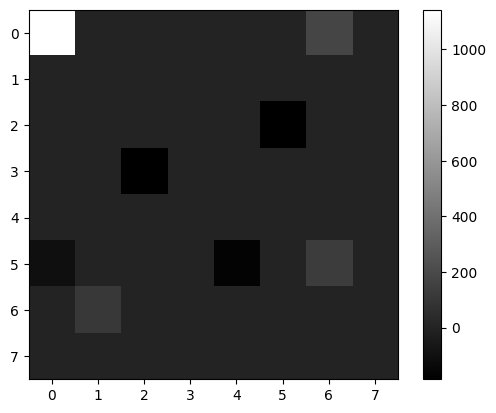

In [20]:
# Apply thresholding to the DCT coefficients
threshold = 100
dct_thresholded = np.where(np.abs(dct) < threshold, 0, dct)

# Display the thresholded DCT coefficients
plt.figure()
plt.imshow(dct_thresholded, cmap='gray')
plt.colorbar()
plt.show()

In [21]:
# Compare the size of the original signal and the thresholded DCT coefficients
size_original = signal.size
size_intermediate = dct.size
size_thresholded = np.sum(np.abs(dct_thresholded) > 0)
compression_ratio = size_original / size_thresholded
print(f"Original size: {size_original}")
print(f"Intermediate size: {size_intermediate}")
print(f"Thresholded size: {size_thresholded}")
print(f"Compression ratio: {compression_ratio:.2f}")

Original size: 64
Intermediate size: 64
Thresholded size: 8
Compression ratio: 8.00


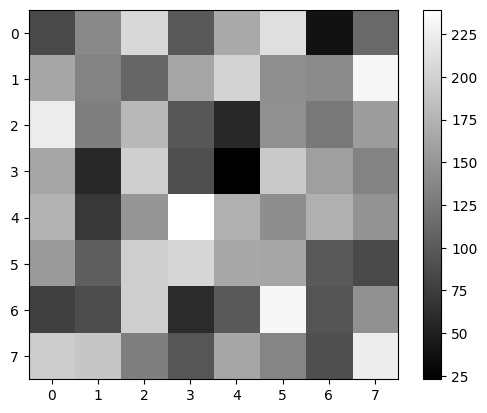

In [22]:
# Reconstruct the signal from the thresholded DCT coefficients
signal_reconstructed = D.T @ dct_thresholded @ D

# Display the reconstructed signal
plt.figure()
plt.imshow(signal_reconstructed, cmap='gray')
plt.colorbar()
plt.show()

In [23]:
# Compare the original signal and the reconstructed signal
error = np.mean(np.abs(signal - signal_reconstructed))
print(f"Mean absolute error: {error:.2f}")

Mean absolute error: 36.46


## Run compression on lena.png

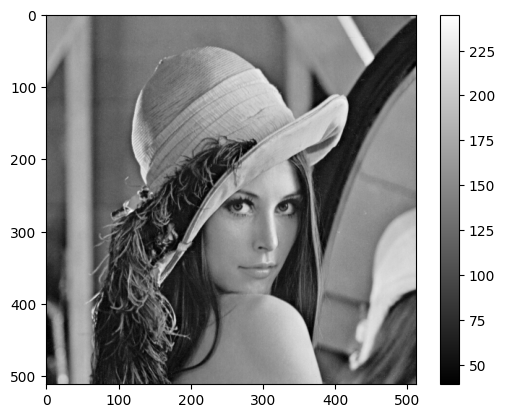

In [24]:
import cv2

# Load the image
I = cv2.imread('../data/lena.png', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

Since the lena.png image is size 512x512 we have to use convolution to apply the matrix D on our image to be compressed.  
For this we will use the convolve2d() method of scipy.signal

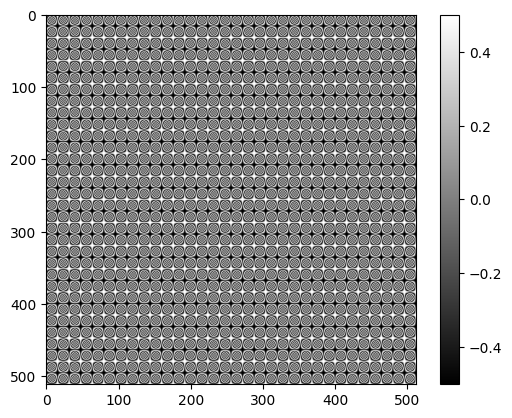

In [28]:
# Compute the DCT matrix
D = np.zeros_like(I, dtype=float)
for k in range(I.shape[0]):
    for n in range(I.shape[1]):
        alpha_k = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)
        D[k, n] = alpha_k * np.cos((np.pi * (2*n + 1) * k) / (2 * N))

# Display the DCT matrix
plt.figure()
plt.imshow(D, cmap='gray')
plt.colorbar()
plt.show()

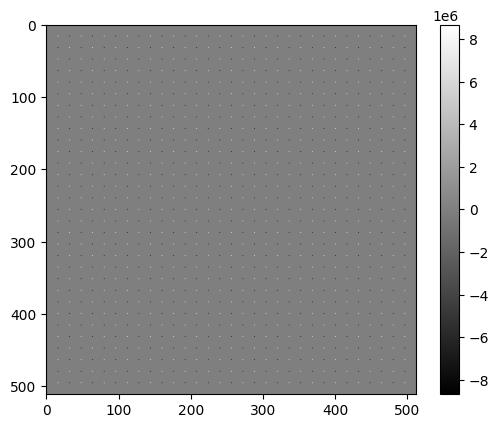

In [ ]:
# Compute the DCT of the image using our DCT matrix
X = D @ I @ D.T

# Display the DCT of the image
plt.figure()
plt.imshow(X, cmap='gray')
plt.colorbar()
plt.show()

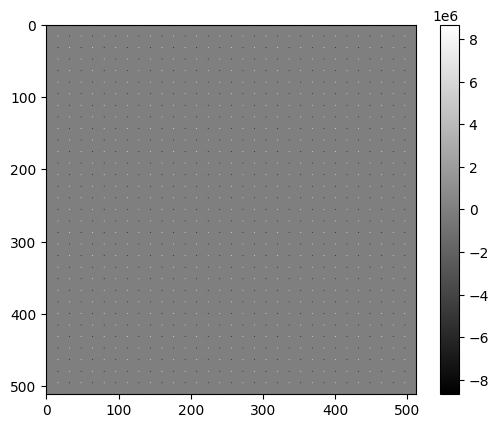

In [26]:
# Threshold the DCT coefficients
threshold = 100
X_thresholded = np.where(np.abs(X) < threshold, 0, X)

# Display the thresholded DCT coefficients
plt.figure()
plt.imshow(X_thresholded, cmap='gray')
plt.colorbar()
plt.show()

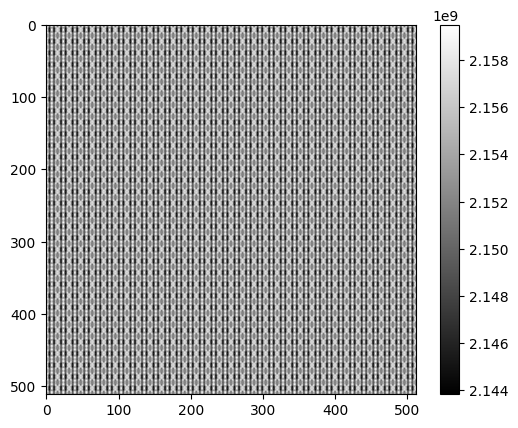

In [27]:
# Reconstruct the image from the thresholded DCT coefficients
I_reconstructed = D.T @ X_thresholded @ D

# Display the reconstructed image
plt.figure()
plt.imshow(I_reconstructed, cmap='gray')
plt.colorbar()
plt.show()